In [57]:
import os
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

from kedro.pipeline import *
from kedro.io import *
from kedro.runner import *

import pickle
import os

In [58]:
# Load the paediatric data :AIOLOS19-12-2023
import pandas as pd
import numpy as np

# Load the data in xlsx file 
df = pd.read_csv('../data/04_feature/table_I_final.csv')
df

,WEEK_LABEL,DIAGNOSIS_CATEGORY,AGE_CLASS,RSS_DURATION_CLASS,N_CASES,BASELINE_N_CASES,LOWER_CI_BASELINE_N_CASES,UPPER_CI_BASELINE_N_CASES,correction_factor,N_CASES_NOWCAST,ALERT_N_CASES,N_CASES_SMOOTH
0,2022-01-03,COVID-19,65 years and older,5 days and more,106.0,127,75.073938,178.926062,1.00,106.000000,0,106.000000
1,2022-01-10,COVID-19,65 years and older,5 days and more,129.0,127,75.073938,178.926062,1.00,129.000000,0,117.503194
2,2022-01-17,COVID-19,65 years and older,5 days and more,146.0,127,75.073938,178.926062,1.00,146.000000,0,127.007407
3,2022-01-24,COVID-19,65 years and older,5 days and more,133.0,127,75.073938,178.926062,1.00,133.000000,0,128.506804
4,2022-01-31,COVID-19,65 years and older,5 days and more,120.0,127,75.073938,178.926062,1.00,120.000000,0,126.803552
...,...,...,...,...,...,...,...,...,...,...,...,...
9625,2023-12-18,RSV,[50 - 65[ years,[2 - 5[ days,1.0,0,0.000000,0.373553,0.84,1.190476,1,0.090085
9626,2023-12-25,RSV,[50 - 65[ years,[2 - 5[ days,0.0,0,0.000000,0.373553,0.68,0.000000,0,0.089193
9627,2024-01-01,RSV,[50 - 65[ years,[2 - 5[ days,0.0,0,0.000000,0.373553,0.52,0.000000,0,0.088319
9628,2024-01-08,RSV,[50 - 65[ years,[2 - 5[ days,0.0,0,0.000000,0.373553,0.36,0.000000,0,0.087461


In [59]:
# df_negative_cases = df
# df_negative_cases = df_negative_cases[df_negative_cases['AGE_CLASS'] == "[20 - 50[ years"]
# df_negative_cases = df_negative_cases[df_negative_cases['RSS_DURATION_CLASS'] == "[2 - 5[ days"]
# df_negative_cases = df_negative_cases[df_negative_cases['WEEK_LABEL'] == "2023-08-21"]

# df_negative_cases

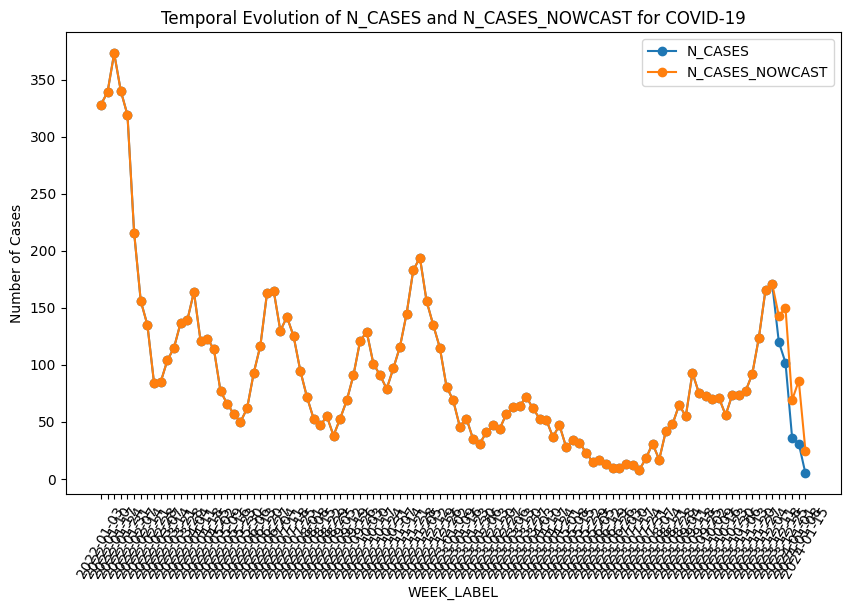

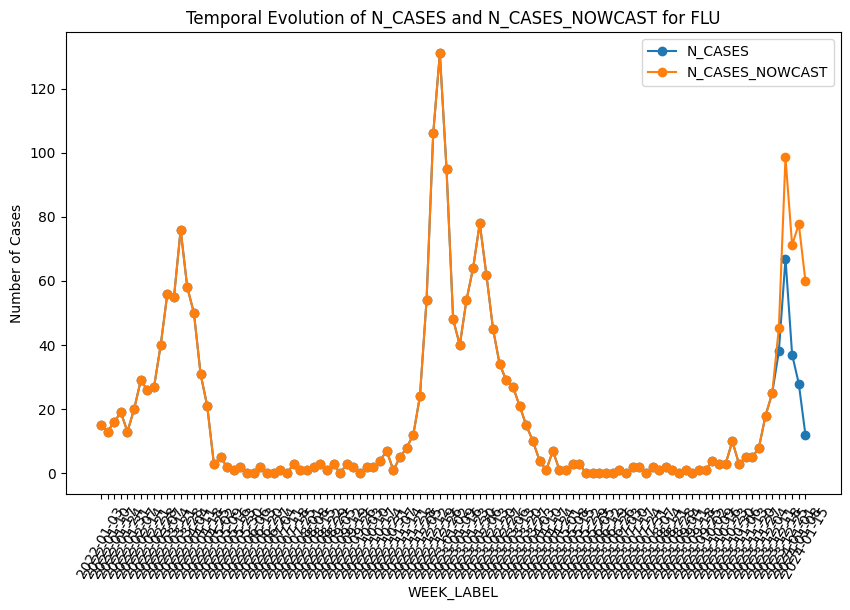

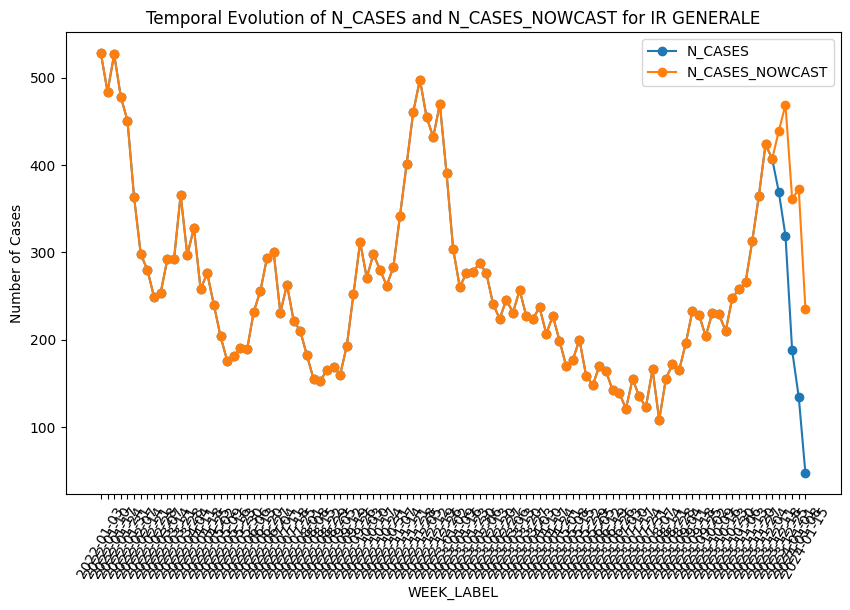

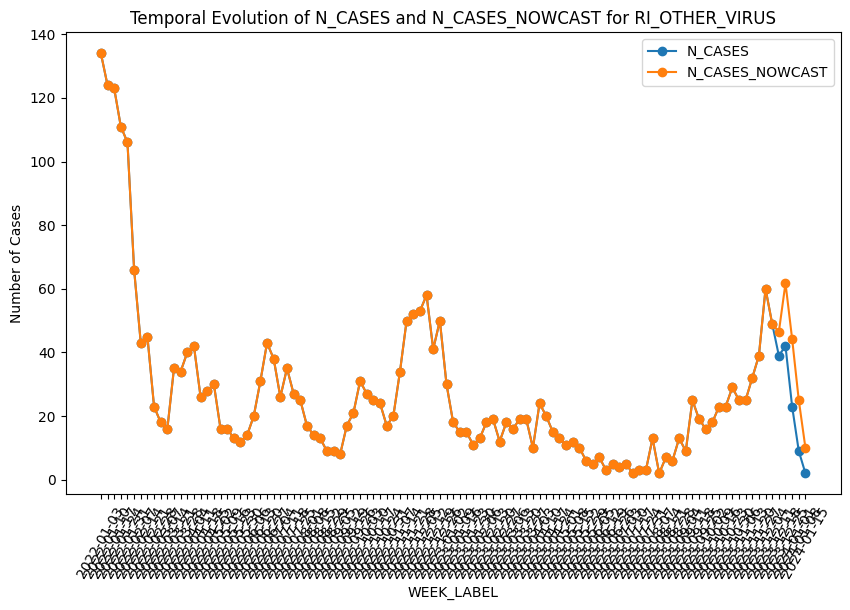

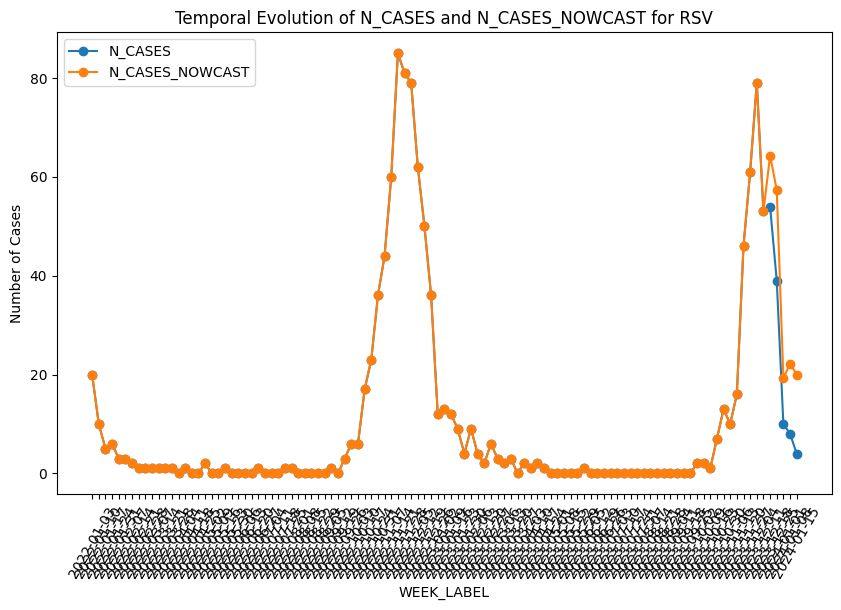

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# df = ...

# Step 1: Calculate the sum by DIAGNOSIS_CATEGORY and WEEK_LABEL
df_sum = df.groupby(['DIAGNOSIS_CATEGORY', 'WEEK_LABEL']).agg({
    'N_CASES': 'sum',
    'BASELINE_N_CASES': 'sum',
    'N_CASES_NOWCAST': 'sum'
}).reset_index()

# Step 2: Create plots for each DIAGNOSIS_CATEGORY
diagnosis_categories = df_sum['DIAGNOSIS_CATEGORY'].unique()

for category in diagnosis_categories:
    # Filter the DataFrame for the specific DIAGNOSIS_CATEGORY
    df_category = df_sum[df_sum['DIAGNOSIS_CATEGORY'] == category]

    # Create a plot for N_CASES and N_CASES_NOWCAST
    plt.figure(figsize=(10, 6))
    plt.plot(df_category['WEEK_LABEL'], df_category['N_CASES'], label='N_CASES', marker='o')
    plt.plot(df_category['WEEK_LABEL'], df_category['N_CASES_NOWCAST'], label='N_CASES_NOWCAST', marker='o')
    
    # Add labels and title to the plot
    plt.xlabel('WEEK_LABEL')
    plt.ylabel('Number of Cases')
    plt.title(f'Temporal Evolution of N_CASES and N_CASES_NOWCAST for {category}')
    
    # Rotate x-axis labels by 90 degrees
    plt.xticks(rotation=60)
    
    # Show the legend
    plt.legend()
    
    # Show the plot
    plt.show()


In [52]:
resultat_filtré = df[(df['DIAGNOSIS_CATEGORY'] == 'COVID_19')]
resultat_filtré = resultat_filtré[(resultat_filtré['AGE_CLASS'] == '65 years and older')]
df_filtered = resultat_filtré[(resultat_filtré['RSS_DURATION_CLASS'] == '5 days and more')]

In [44]:
# Load the paediatric data :AIOLOS19-12-2023
from scipy import stats
import numpy as np

# Load the data in xlsx file 

mean, sigma = np.mean(df_filtered["N_CASES"]), np.std(df_filtered["N_CASES"])

In [46]:
conf_int = stats.norm.interval(0.95, loc=mean, 
    scale=sigma)
conf_int

(-2.1193192004769656, 39.858449635259575)

In [ ]:
conf_int = stats.norm.interval(0.95, loc=mean, 
    scale=sigma)
conf_int

(-2.1193192004769656, 39.858449635259575)